# Prediction using Unsupervised ML
**Author: Ishani Kathuria**

Given a dataset with Sepal and Petal lengths and width of flowers, I used unsupervised learning methods to fit a K-Means Cluster algorithm that would then be able to classify the data into different clusters depicting the different Iris species the data points belong to.

In [1]:
# preprocessing
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split

# model imports
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, adjusted_rand_score, fowlkes_mallows_score

# plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

In [2]:
# importing the dataset as a pandas dataframe
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# dropping the unnecessary id column
data = data.drop(columns='Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

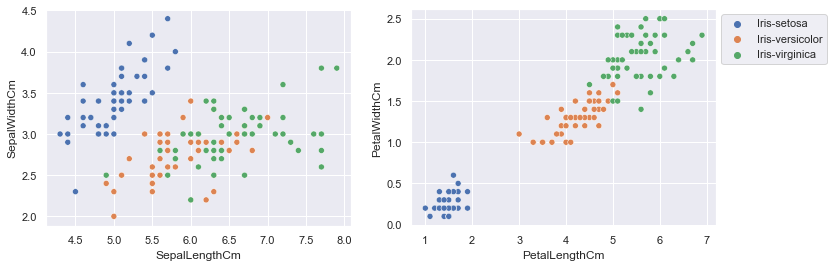

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Sepal scatterplot
sns.scatterplot(data=data, x="SepalLengthCm", y="SepalWidthCm",
                ax=axes[0], hue='Species', legend=False)
# Petal scatterplot
sns.scatterplot(data=data, x="PetalLengthCm", y="PetalWidthCm",
                ax=axes[1], hue='Species')

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Dividing the dataset

I divided the dataset into 3 different sets,
1. `all_x`, All parameters of Speal length, Sepal width, Petal length and Petal width.
2. `sepal_x`, Only Sepal length and width.
3. `petal_x`, Only Petal length and width.

I also set `y_true` with the correct species values of the dataset.

In [8]:
all_x = data.iloc[:,[0, 1, 2, 3]].values
sepal_x = data.iloc[:,[0, 1]].values
petal_x = data.iloc[:,[2, 3]].values

In [9]:
species_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y_true = np.array([species_dict[i] for i in data.iloc[:,4].values])

## K-Means Clustering Algorithm

K-Means Clustering is an unsupervised learning method which selects random positions of _k_ centroids and then divides the datapoints into different clusters depending on which centroid they are closest to. The algorithm performs iterative calculations to optimize the positions of the centroids.

<img src="https://www.jeremyjordan.me/content/images/2016/12/kmeans.gif" width="450" align="center">

### Elbow  method

The optimal number of clusters were calculated using the elbow method. Here, different sum of squared differences are calculated for k in the range of 1 to 14 and then plotted on a graph. I plotted 3 graphs for my 3 sets of data mentioned earlier, `all_x`, `sepal_x` and `petal_x`.

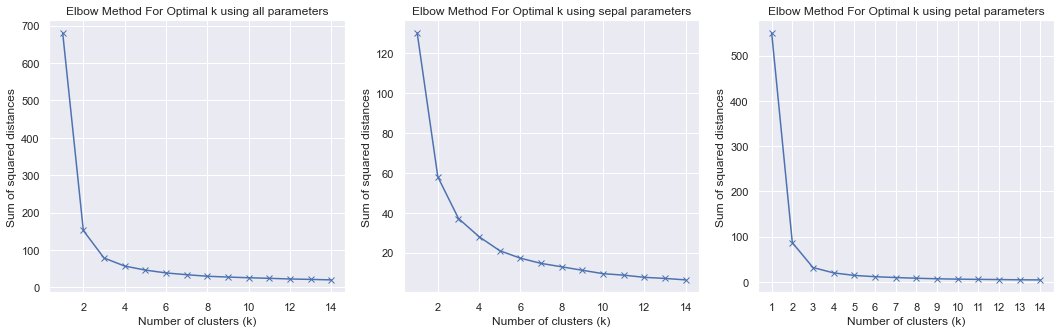

In [10]:
all_sse = []
sepal_sse = []
petal_sse = []

for k in range(1, 15):
    # all
    total_kmeans = KMeans(n_clusters=k, init='k-means++',
                          max_iter=300, n_init=10, random_state=0).fit(all_x)
    all_sse.append(total_kmeans.inertia_)
    
    # sepal
    sepal_kmeans = KMeans(n_clusters=k, init='k-means++',
                          max_iter=300, n_init=10, random_state=0).fit(sepal_x)
    sepal_sse.append(sepal_kmeans.inertia_)
    
    # petal
    petal_kmeans = KMeans(n_clusters=k, init='k-means++',
                          max_iter=300, n_init=10, random_state=0).fit(petal_x)
    petal_sse.append(petal_kmeans.inertia_)

fix, axes = plt.subplots(1, 3, figsize=(18,5))
axes[0].plot(range(1, 15), all_sse, 'bx-')
axes[0].set_title('Elbow Method For Optimal k using all parameters')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Sum of squared distances')

axes[1].plot(range(1, 15), sepal_sse, 'bx-')
axes[1].set_title('Elbow Method For Optimal k using sepal parameters')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Sum of squared distances')

axes[2].plot(range(1, 15), petal_sse, 'bx-')
axes[2].set_title('Elbow Method For Optimal k using petal parameters')
axes[2].set_xlabel('Number of clusters (k)')
axes[2].set_ylabel('Sum of squared distances')

plt.xticks(range(1, 15))
plt.show();

Fitting the 3 models by using number of clusters, k=3

In [11]:
# total Kmeans clustering
all_kmeans = KMeans(n_clusters=3, init='k-means++',
                      max_iter=300, n_init=10, random_state=0)
all_y_kmeans = all_kmeans.fit_predict(all_x)

In [12]:
# only sepal Kmeans clustering
sepal_kmeans = KMeans(n_clusters=3, init='k-means++',
                      max_iter=300, n_init=10, random_state=0)
sepal_y_kmeans = sepal_kmeans.fit_predict(sepal_x)

In [13]:
# only petal Kmeans clustering
petal_kmeans = KMeans(n_clusters=3, init='k-means++',
                      max_iter=300, n_init=10, random_state=0)
petal_y_kmeans = petal_kmeans.fit_predict(petal_x)

### All parameters

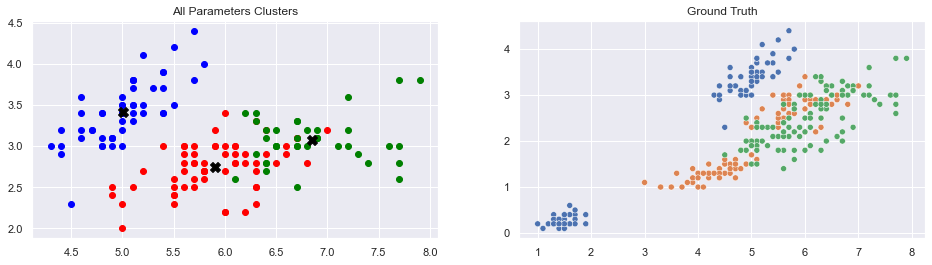

In [14]:
# Visualising the clusters and comaring models
fig, axes = plt.subplots(1, 2, figsize=(16,4))

# all params clusters
axes[0].scatter(all_x[all_y_kmeans == 0, 0], all_x[all_y_kmeans == 0, 1], 
            c='red', label='Iris-setosa')
axes[0].scatter(all_x[all_y_kmeans == 1, 0], all_x[all_y_kmeans == 1, 1], 
            c='blue', label='Iris-versicolor')
axes[0].scatter(all_x[all_y_kmeans == 2, 0], all_x[all_y_kmeans == 2, 1],
            c='green', label='Iris-virginica')

axes[0].scatter(all_kmeans.cluster_centers_[:, 0], all_kmeans.cluster_centers_[:,1], 
            c='black', marker='X', s=100, label='centroids')

axes[0].set_title('All Parameters Clusters')

# ground truth
sns.scatterplot(data=data, x="SepalLengthCm", y="SepalWidthCm", ax=axes[1],
                hue='Species', legend=False)
sns.scatterplot(data=data, x="PetalLengthCm", y="PetalWidthCm", ax=axes[1],
                hue='Species', legend=False)

axes[1].set_title('Ground Truth')
axes[1].set_ylabel('')
axes[1].set_xlabel('')

plt.show();

### Sepal parameters

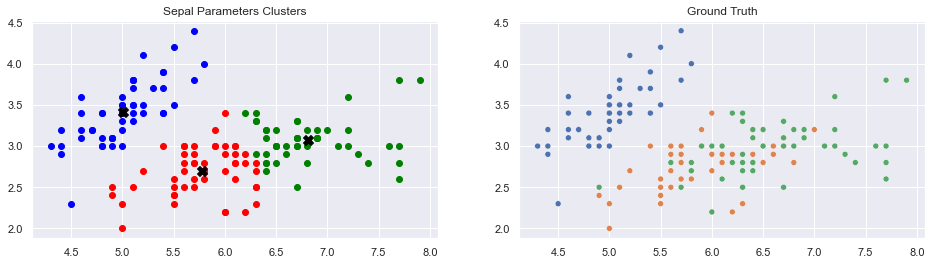

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))

# sepal clusters
axes[0].scatter(sepal_x[sepal_y_kmeans == 0, 0], sepal_x[sepal_y_kmeans == 0, 1], 
            c='red', label='Iris-setosa')
axes[0].scatter(sepal_x[sepal_y_kmeans == 1, 0], sepal_x[sepal_y_kmeans == 1, 1], 
            c='blue', label='Iris-versicolor')
axes[0].scatter(sepal_x[sepal_y_kmeans == 2, 0], sepal_x[sepal_y_kmeans == 2, 1],
            c='green', label='Iris-virginica')

axes[0].scatter(sepal_kmeans.cluster_centers_[:, 0], sepal_kmeans.cluster_centers_[:,1], 
            c='black', marker='X', s=100, label='centroids')

axes[0].set_title('Sepal Parameters Clusters')

# ground truth
sns.scatterplot(data=data, x="SepalLengthCm", y="SepalWidthCm",
                ax=axes[1], hue='Species', legend=False)

axes[1].set_title('Ground Truth')
axes[1].set_ylabel('')
axes[1].set_xlabel('')

plt.show();

### Petal parameters

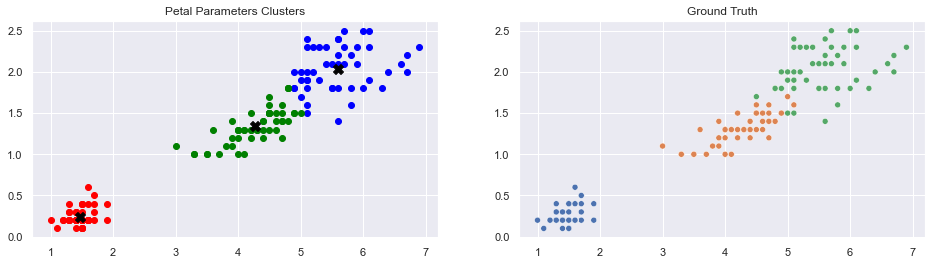

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))

# petal clusters
axes[0].scatter(petal_x[petal_y_kmeans == 0, 0], petal_x[petal_y_kmeans == 0, 1], 
            c='red', label='Iris-setosa')
axes[0].scatter(petal_x[petal_y_kmeans == 1, 0], petal_x[petal_y_kmeans == 1, 1], 
            c='blue', label='Iris-versicolor')
axes[0].scatter(petal_x[petal_y_kmeans == 2, 0], petal_x[petal_y_kmeans == 2, 1],
            c='green', label='Iris-virginica')

axes[0].scatter(petal_kmeans.cluster_centers_[:, 0], petal_kmeans.cluster_centers_[:,1], 
            c='black', marker='X', s=100, label='centroids')

axes[0].set_title('Petal Parameters Clusters')

# ground truth
sns.scatterplot(data=data, x="PetalLengthCm", y="PetalWidthCm",
                ax=axes[1], hue='Species', legend=False)

axes[1].set_title('Ground Truth')
axes[1].set_ylabel('')
axes[1].set_xlabel('')

plt.show();

## Evaluation

Since I had the true values that needed to be predicted, I evaluated the models using 3 different metrics.
1. **Adjusted rand score**, which measures similarity between the model cluster and the actual clusters.

2. **Fowlkes Mallows Score**, also measures the similarity index much like the rand score.

3. **Silhouette score**, this metric is used when the true values are unknown so the model is evaluated against itself. It measures the distinctness of the clusters.

The best value for all 3 parameters is 1.

In [17]:
score = adjusted_rand_score(y_true, all_kmeans.labels_)
print('Adjusted Rand Score:', score)

score = fowlkes_mallows_score(y_true, all_kmeans.labels_)
print('Fowlkes Mallows Score:', score)

score = silhouette_score(all_x, all_kmeans.labels_)
print('Silhouette Score:', score)

Adjusted Rand Score: 0.7302382722834697
Fowlkes Mallows Score: 0.8208080729114153
Silhouette Score: 0.5525919445499757


In [18]:
score = adjusted_rand_score(y_true, sepal_kmeans.labels_)
print('Adjusted Rand Score:', score)

score = fowlkes_mallows_score(y_true, sepal_kmeans.labels_)
print('Fowlkes Mallows Score:', score)

score = silhouette_score(sepal_x, sepal_kmeans.labels_)
print('Silhouette Score:', score)

Adjusted Rand Score: 0.6006861021484542
Fowlkes Mallows Score: 0.7321652438439199
Silhouette Score: 0.4434693231245126


In [19]:
score = adjusted_rand_score(y_true, petal_kmeans.labels_)
print('Adjusted Rand Score:', score)

score = fowlkes_mallows_score(y_true, petal_kmeans.labels_)
print('Fowlkes Mallows Score:', score)

score = silhouette_score(petal_x, petal_kmeans.labels_)
print('Silhouette Score:', score)

Adjusted Rand Score: 0.8856970310281228
Fowlkes Mallows Score: 0.9233071803662838
Silhouette Score: 0.6602760882193361


## Conclusion

I used sklearn to implement the K-Means Clustering Algorithm in python.

After trying 3 different parameters, the best evaluation was given by the third `petal_kmeans`:
* **Adjusted Rand Score** - 0.886
* **Fowlkes Mallows Score** - 0.923
* **Silhouette Score** - 0.660

In [20]:
pickle.dump(
    petal_kmeans,
    open(r"..\..\app\static\models\kmeans.sav", 'wb')
)